In [1]:
import enviroment
import pacman
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

# Needed to hide warnings in the matplotlib sections
import warnings
import numpy as np
warnings.filterwarnings("ignore")

In [2]:
maze_arqs = {'Mazes/TinyMaze01.txt':[30,28],
             'Mazes/SmallMaze01.txt':[30,84],
             'Mazes/SmallMaze02.txt':[30,56],
             'Mazes/MediumMaze01.txt':[60,56],
             'Mazes/MediumMaze02.txt':[60,112],
             'Mazes/BigMaze01.txt':[60,140],
             'Mazes/BigMaze02.txt':[90,140],
             'maze-test.txt':[28,28]}

In [3]:
maze_name = 'Mazes/TinyMaze01.txt'
maze, initial_position, goal_position = enviroment.getMazeTest(maze_name, maze_arqs[maze_name][0], maze_arqs[maze_name][1])
print("Initial position: " + str(initial_position))
print("Goal position: " + str(goal_position))

Initial position: (3, 4)
Goal position: (24, 21)


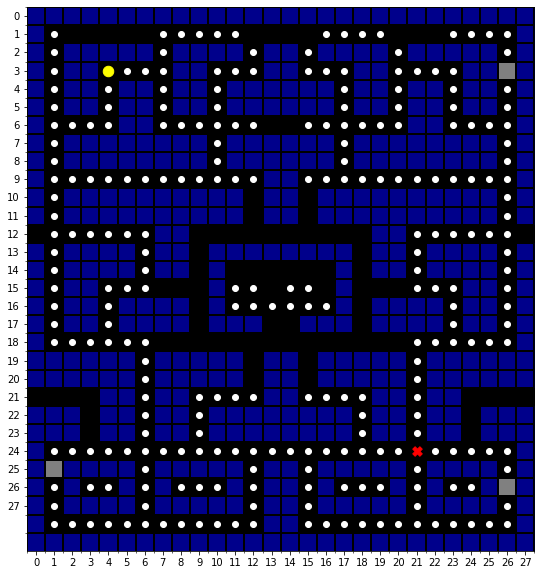

In [4]:
grid, food_x, food_y = maze.get_int_grid(initial_position, goal_position)

fig, ax = plt.subplots(figsize=(10, 10))
cmap = colors.ListedColormap(['black','gray', 'darkblue'])

im = ax.imshow(grid, cmap=cmap)
ax = plt.gca()

ax.set_xticks(np.arange(len(grid)))
ax.set_yticks(np.arange(len(grid[0])))
ax.set_xticklabels(np.arange(0, len(grid), 1))
ax.set_yticklabels(np.arange(0, len(grid[0]), 1))

ax.set_xticks(np.arange(-.5, len(grid)-1, 1), minor=True);
ax.set_yticks(np.arange(-.5, len(grid)-1, 1), minor=True);
ax.grid(which='minor', color='black', linestyle='-', linewidth=2)


ax.scatter(food_y, food_x, color = 'white', zorder=10)
ax.scatter(initial_position[1], initial_position[0], marker='o', color='yellow',s=110)
ax.scatter(goal_position[1], goal_position[0], marker='X', color='red', s=90)

plt.show()

In [5]:
problem = pacman.Problem(maze, initial_position, goal_position)

# Breadth First Search - BFS

In [6]:
node, expanded_nodes, food_nodes = pacman.breadth_first_graph_search(problem)
print("Number of expanded nodes:")
print(expanded_nodes)
print("Number of expanded food nodes:")
print(food_nodes)
print(node.solution())
print("Path:")
print(node.path())

Number of expanded nodes:
231
Number of expanded food nodes:
171
[<Actions.DOWN: (1, 0)>, <Actions.DOWN: (1, 0)>, <Actions.DOWN: (1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.DOWN: (1, 0)>, <Actions.DOWN: (1, 0)>, <Actions.DOWN: (1, 0)>, <Actions.DOWN: (1, 0)>, <Actions.DOWN: (1, 0)>, <Actions.DOWN: (1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.DOWN: (1, 0)>, <Actions.DOWN: (1, 0)>, <Actions.DOWN: (1, 0)>, <Actions.DOWN: (1, 0)>, <Actions.DOWN: (1, 0)>, <Actions.DOWN: (1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.DOWN: (1, 0)>, <Actions.DOWN: (1, 0)>, <Actions.DOWN: (1, 0)>, <Actions.DOWN: (1, 0)>, <Actions.DOWN: (1, 0)>, <Actions.DOWN: (1, 0)>]
Path:
[<Node (3, 4)>, <Node (4, 4)>, <Node (5, 4)>, <Node (6, 4)>, <Node (6, 3)>, <Node (6, 2)>, <Node (6, 1)>, <Node (7, 1)>, <Node (8, 1)>, <Node (9, 1)>

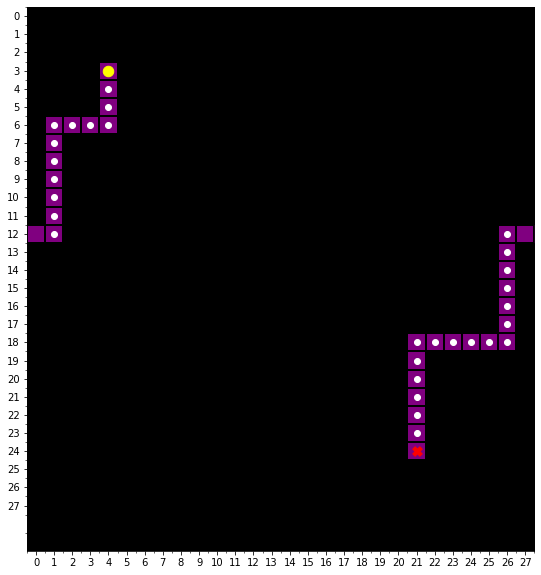

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
cmap = colors.ListedColormap(['purple', 'black'])

grid, food_x, food_y = maze.get_final_grid(initial_position, goal_position, [n.state for n in node.path()])

im = ax.imshow(grid, cmap=cmap)
ax = plt.gca()

ax.set_xticks(np.arange(len(grid)))
ax.set_yticks(np.arange(len(grid[0])))
ax.set_xticklabels(np.arange(0, len(grid), 1))
ax.set_yticklabels(np.arange(0, len(grid[0]), 1))

ax.set_xticks(np.arange(-.5, len(grid)-1, 1), minor=True);
ax.set_yticks(np.arange(-.5, len(grid)-1, 1), minor=True);
ax.grid(which='minor', color='black', linestyle='-', linewidth=2)


ax.scatter(food_y, food_x, color = 'white', zorder=10)
ax.scatter(initial_position[1], initial_position[0], marker='o', color='yellow',s=110)
ax.scatter(goal_position[1], goal_position[0], marker='X', color='red', s=90)

plt.show()

# Depth First Search - DFS

In [8]:
node, expanded_nodes, food_nodes = pacman.depth_first_graph_search(problem)
print("Number of expanded nodes:")
print(expanded_nodes)
print("Number of expanded food nodes:")
print(food_nodes)
print(node.solution())
print("Path:")
print(node.path())

Number of expanded nodes:
131
Number of expanded food nodes:
82
[<Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.DOWN: (1, 0)>, <Actions.DOWN: (1, 0)>, <Actions.DOWN: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (-1, 0)>, <Actions.UP: (-1, 0)>, <Actions.UP: (-1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.DOWN: (1, 0)>, <Actions.DOWN: (1, 0)>, <Actions.DOWN: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.DOWN: (1, 0)>, <Actions.DOWN: (1, 0)>, <Actions.DOWN: (1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, 

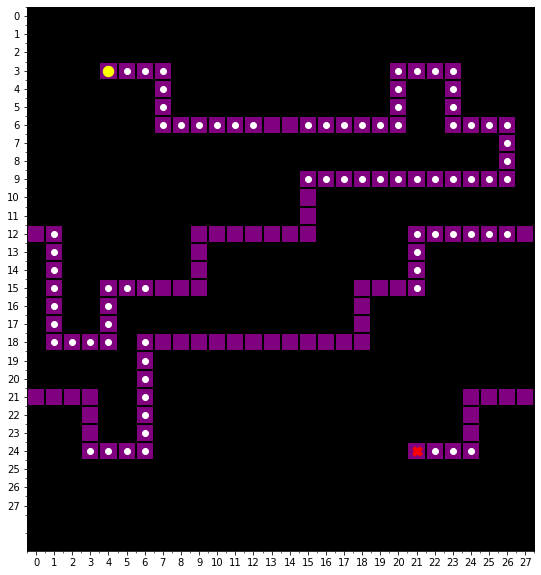

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
cmap = colors.ListedColormap(['purple', 'black'])

grid, food_x, food_y = maze.get_final_grid(initial_position, goal_position, [n.state for n in node.path()])

im = ax.imshow(grid, cmap=cmap)
ax = plt.gca()

ax.set_xticks(np.arange(len(grid)))
ax.set_yticks(np.arange(len(grid[0])))
ax.set_xticklabels(np.arange(0, len(grid), 1))
ax.set_yticklabels(np.arange(0, len(grid[0]), 1))

ax.set_xticks(np.arange(-.5, len(grid)-1, 1), minor=True);
ax.set_yticks(np.arange(-.5, len(grid)-1, 1), minor=True);
ax.grid(which='minor', color='black', linestyle='-', linewidth=2)


ax.scatter(food_y, food_x, color = 'white', zorder=10)
ax.scatter(initial_position[1], initial_position[0], marker='o', color='yellow',s=110)
ax.scatter(goal_position[1], goal_position[0], marker='X', color='red', s=90)

plt.show()

# Greedy Search - Manhattan Distance

In [10]:
node, expanded_nodes, food_nodes = pacman.greedy_best_first_search(problem)
print("Number of expanded nodes:")
print(expanded_nodes)
print("Number of expanded food nodes:")
print(food_nodes)
print(node.solution())
print("Path:")
print(node.path())

Number of expanded nodes:
60
Number of expanded food nodes:
55
[<Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.DOWN: (1, 0)>, <Actions.DOWN: (1, 0)>, <Actions.DOWN: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.DOWN: (1, 0)>, <Actions.DOWN: (1, 0)>, <Actions.DOWN: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.DOWN: (1, 0)>, <Actions.DOWN: (1, 0)>, <Actions.DOWN: (1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.DOWN: (1, 0)>, <Actions.DOWN: (1, 0)

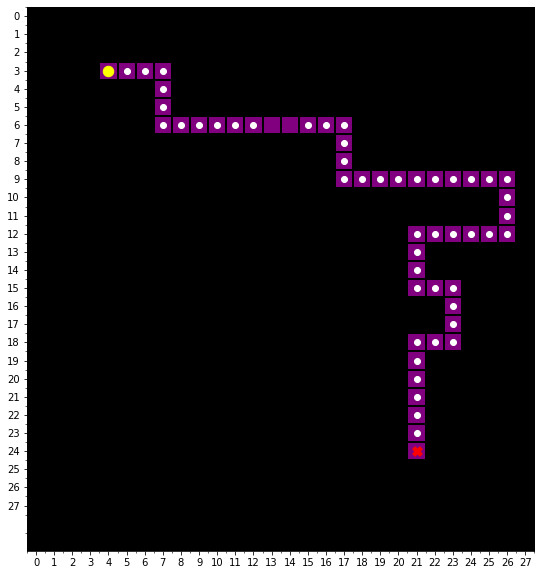

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
cmap = colors.ListedColormap(['purple', 'black'])

grid, food_x, food_y = maze.get_final_grid(initial_position, goal_position, [n.state for n in node.path()])

im = ax.imshow(grid, cmap=cmap)
ax = plt.gca()

ax.set_xticks(np.arange(len(grid)))
ax.set_yticks(np.arange(len(grid[0])))
ax.set_xticklabels(np.arange(0, len(grid), 1))
ax.set_yticklabels(np.arange(0, len(grid[0]), 1))

ax.set_xticks(np.arange(-.5, len(grid)-1, 1), minor=True);
ax.set_yticks(np.arange(-.5, len(grid)-1, 1), minor=True);
ax.grid(which='minor', color='black', linestyle='-', linewidth=2)


ax.scatter(food_y, food_x, color = 'white', zorder=10)
ax.scatter(initial_position[1], initial_position[0], marker='o', color='yellow',s=110)
ax.scatter(goal_position[1], goal_position[0], marker='X', color='red', s=90)

plt.show()